In [1]:
from ovito.io import *
from ovito.modifiers import CoordinationAnalysisModifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

# ◆  Density=0.749 - seed of 37 atoms (different lattice spacings)

In [62]:
totalatoms=10217
density=0.749

## ▻ Radial Distribution Function -  Pure Liquid 

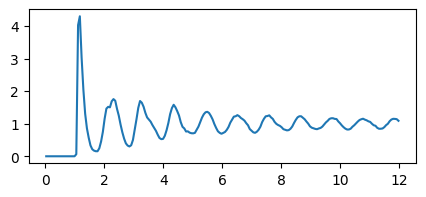

In [63]:
rdfl= pd.read_csv(f'density--{totalatoms}--116.72x116.72/pure-liquid/rdf-pure_liquid.txt', sep=" ", skiprows=2, header=None) 
# rdfc= pd.read_csv('pure_crystal/rdf-pure_crystal.txt', sep=" ", skiprows=2, header=None)

xl=rdfl[0]
yl=rdfl[1]

colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive', 'tab:brown' ]

plt.figure(figsize=(5,2))
plt.plot(xl,yl, color='tab:blue')

## ▻ Bond Orientational Order - Pure Liquid

Text(0.5, 1.0, 'q6 histogram of pure liquid system')

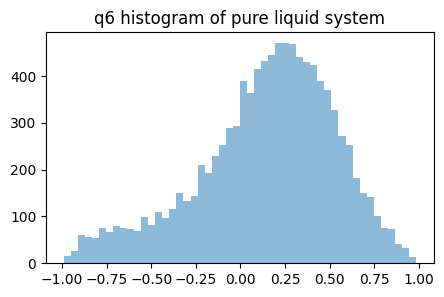

In [64]:
q6r_l, lq6i_l = np.genfromtxt(f'density--{totalatoms}--116.72x116.72/pure-liquid/dump-q.lammpstrj',skip_header=9, unpack=True, usecols=(5,6))

plt.figure(figsize=(5,3))
plt.hist(q6r_l, alpha=0.5, bins=50, density=False, stacked=True, color='tab:blue')
plt.title('q6 histogram of pure liquid system')

## ▻ Radial Distribution Function - 37 atoms

In [65]:
scales=['0.3','0.4']
times=['25','50','75','100']
mydatardf = []
atoms=37

for i in scales:
    for time in times:
        my_rdf_file= pd.read_csv(f'density--{totalatoms}--116.72x116.72/hex-{i}/{atoms}-atoms/rdf_at_t{time}-{atoms}-atoms.txt', sep=" ", skiprows=2, header=None)
        mydatardf.append(my_rdf_file)
xrdf=[]
yrdf=[]

for i in range(len(mydatardf)):
    xxrdf=mydatardf[i][0]
    yyrdf=mydatardf[i][1]
    xrdf.append(xxrdf)
    yrdf.append(yyrdf)

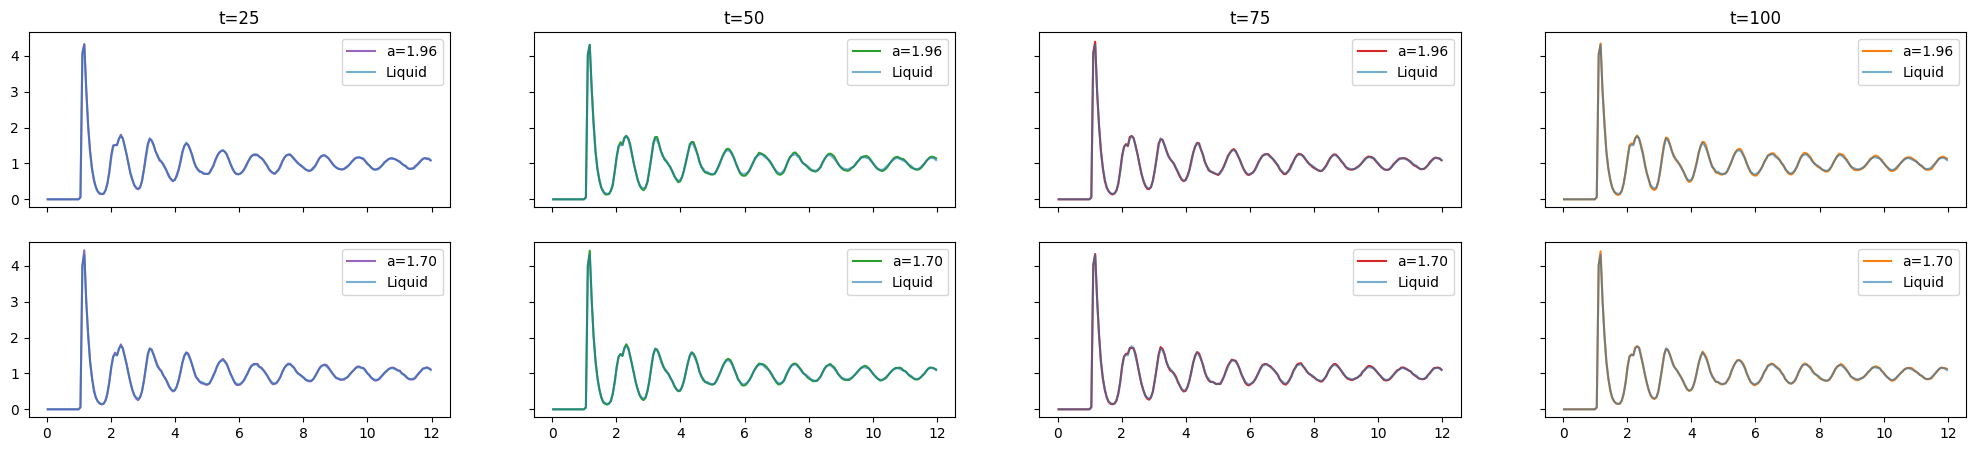

In [66]:
scales=['0.3','0.4','0.5','0.6','0.7']
lats=['1.96','1.70','1.52','1.38','1.29']
times=['25','50','75','100']

fig, ax = plt.subplots(2, 4, figsize=(25,5), dpi=100, sharex=True, sharey=True)
colors = ['tab:purple','tab:green', 'tab:red','tab:orange' ]

v=4
for i in range(len(mydatardf)):
    if i<=3:
        n=0
        ii=i-n*v
        ax[n,ii].plot(xrdf[i], yrdf[i], color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')
        ax[n,ii].set_title(f't={times[i]}')
        ax[n,ii].legend(loc='upper right')
    elif 3<i<=7:
        n=1
        ii=i-n*v
        ax[n,ii].plot(xrdf[i], yrdf[i], color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')
        ax[n,ii].legend(loc='upper right')
    elif 7<i<=11:
        n=2
        ii=i-n*v
        ax[n,ii].plot(xrdf[i], yrdf[i], color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')      
        ax[n,ii].legend(loc='upper right')
    elif 11<i<=15:
        n=3
        ii=i-n*v
        ax[n,ii].plot(xrdf[i], yrdf[i], color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')
        ax[n,ii].legend(loc='upper right')
    elif 15<i<=19:
        n=4
        ii=i-n*v
        ax[n,ii].plot(xrdf[i], yrdf[i], color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')
        ax[n,ii].legend(loc='upper right')

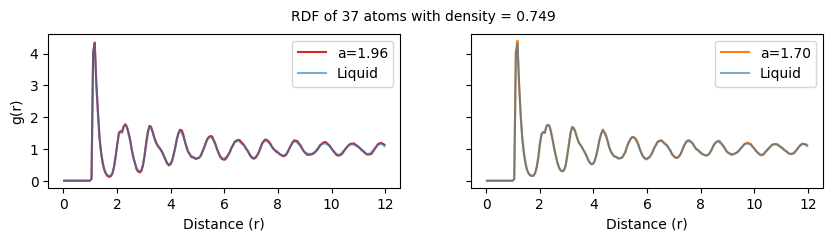

In [67]:
scales=['0.3','0.4']
lats=['1.96','1.70','1.52','1.38','1.29']
atoms=37

fig, ax = plt.subplots(1, 2, figsize=(10,2), dpi=100, sharex=True, sharey=True)
colors = ['tab:red','tab:orange', 'tab:green','tab:purple','tab:brown']

for i in range(len(scales)):
    ii= 4*i+3
    # print(ii)
    ax[i].plot(xrdf[ii], yrdf[ii], color=colors[i],label=f'a={lats[i]}')
    ax[i].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')
    ax[i].legend(loc='upper right')
    ax[0].set_ylabel('g(r)')
    ax[i].set_xlabel('Distance (r)')

    
plt.suptitle(f'RDF of {atoms} atoms with density = {density}', y=1, size=10)

# plt.savefig(f'rdf_{atoms}-atoms_d-{density}.png', dpi=100,bbox_inches='tight')

## ▻ Bond Order Analysis - 37 atoms

In [68]:
scales=['0.3','0.4']
times=['25','50','75','100']
mydataq = []

atoms=37
for i in scales:
    for time in times:
        myfileq= np.genfromtxt(f'density--{totalatoms}--116.72x116.72/hex-{i}/{atoms}-atoms/dump-q-at_t{time}-{atoms}.lammpstrj', skip_header=9, unpack=True, usecols=(5,6))
        mydataq.append(myfileq) 
    
xq=[]
yq=[]

for i in range(len(mydataq)):
    xxq=mydataq[i][0]
    yyq=mydataq[i][1]
    xq.append(xxq)
    yq.append(yyq)

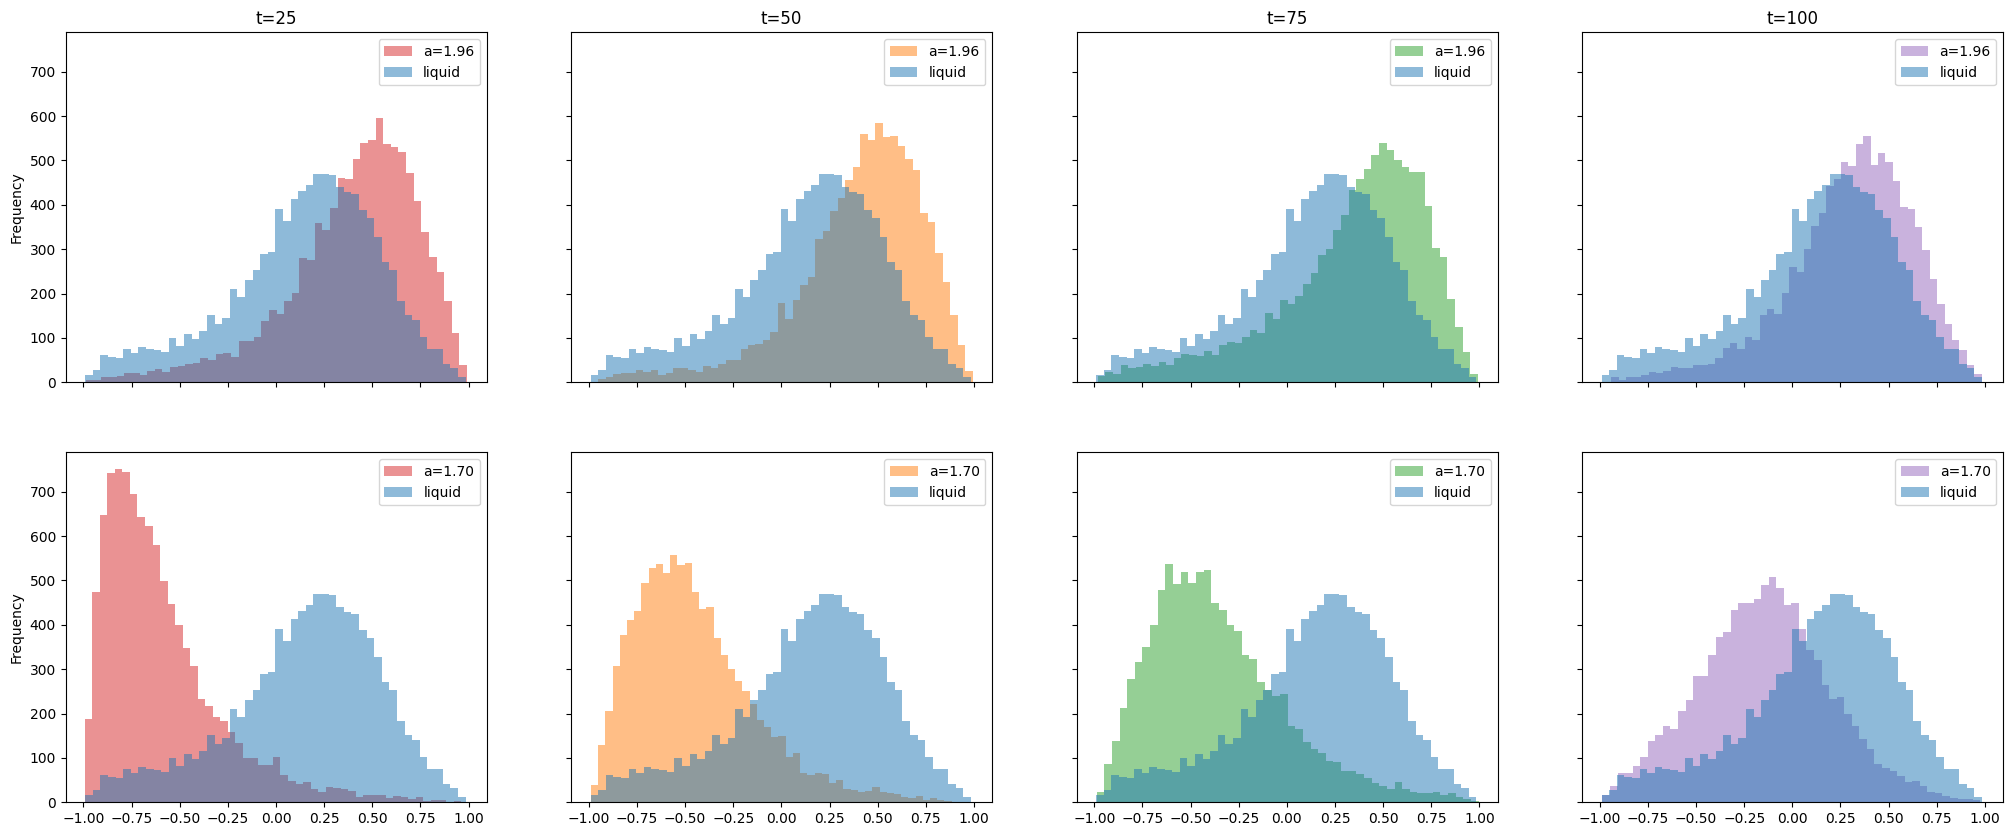

In [69]:
scales=['0.3','0.4']
lats=['1.96','1.70']
times=['25','50','75','100']

fig, ax = plt.subplots(2, 4, figsize=(25,10), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:purple', 'tab:olive', 'tab:brown' ]

v=4
for i in range(len(xq)):
    if i<=3:
        n=0
        ii=i-n*v
        x = xq[i] 
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper right')
        ax[n,0].set_ylabel('Frequency')
        # ax[n,].set_xlabel('q6')
        ax[n,ii].set_title(f't={times[i]}')
    elif 3<i<=7:
        n=1
        ii=i-n*v
        x = xq[i] 
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper right')
        ax[n,0].set_ylabel('Frequency')
    elif 7<i<=11:
        n=2
        ii=i-n*v
        x = xq[i]
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper right')
        ax[n,0].set_ylabel('Frequency')
    elif 11<i<=15:
        n=3
        ii=i-n*v
        x = xq[i] 
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper right')
        ax[n,0].set_ylabel('Frequency')
    elif 15<i<=19:
        n=4
        ii=i-n*v
        x = xq[i]
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper right')
        ax[n,0].set_ylabel('Frequency')

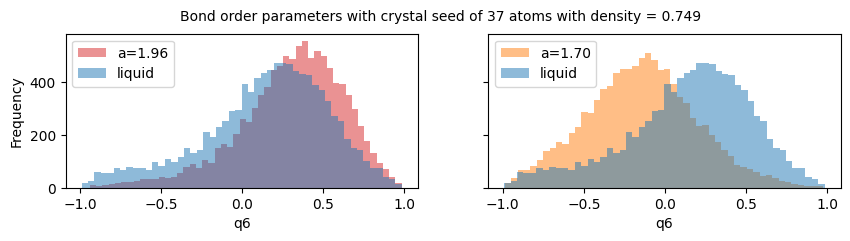

In [70]:
scales=['0.3','0.4']
lats=['1.96','1.70']
atoms=37

fig, ax = plt.subplots(1, 2, figsize=(10,2), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:purple', 'tab:olive', 'tab:brown' ]

for i in range(len(scales)):
    ii= 4*i+3
    # print(ii)
    ax[i].hist(xq[ii], alpha=0.5, bins=50, density=False, stacked=True, color=colors[i],label=f'a={lats[i]}')
    ax[i].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
    ax[i].legend(loc='upper left')
    ax[0].set_ylabel('Frequency')
    ax[i].set_xlabel('q6')
    
plt.suptitle(f'Bond order parameters with crystal seed of {atoms} atoms with density = {density}', y=1, size=10)
    
# plt.savefig(f'hist_{atoms}-atoms_d-{density}.png', dpi=100,bbox_inches='tight')

# ◆  Density=0.769 - seed of 37 atoms (different lattice spacings)

In [4]:
totalatoms=10490
density=0.769

## ▻ Radial Distribution Function -  Pure Liquid 

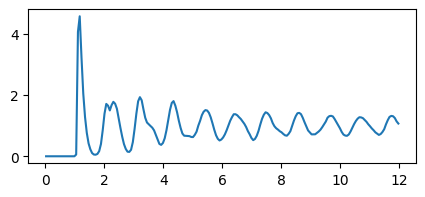

In [5]:
rdfl= pd.read_csv(f'density--{totalatoms}--116.72x116.72/pure-liquid/rdf-pure_liquid.txt', sep=" ", skiprows=2, header=None) 
# rdfc= pd.read_csv('pure_crystal/rdf-pure_crystal.txt', sep=" ", skiprows=2, header=None)

xl=rdfl[0]
yl=rdfl[1]

colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive', 'tab:brown' ]

plt.figure(figsize=(5,2))
plt.plot(xl,yl, color='tab:blue')

## ▻ Bond Orientational Order

Text(0.5, 1.0, 'q6 histogram of pure liquid system')

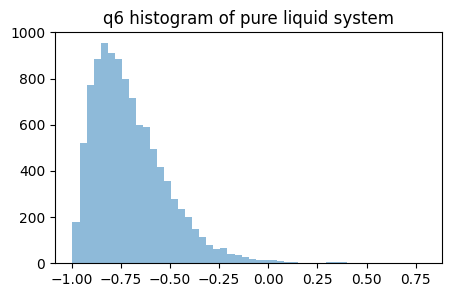

In [6]:
q6r_l, lq6i_l = np.genfromtxt(f'density--{totalatoms}--116.72x116.72/pure-liquid/dump-q.lammpstrj',skip_header=9, unpack=True, usecols=(5,6))

plt.figure(figsize=(5,3))
plt.hist(q6r_l, alpha=0.5, bins=50, density=False, stacked=True, color='tab:blue')
plt.title('q6 histogram of pure liquid system')

## ▻ Radial Distribution Function - 37 atoms

In [74]:
scales=['0.3','0.4']
times=['25','50','75','100']
mydatardf = []
atoms=37

for i in scales:
    for time in times:
        my_rdf_file= pd.read_csv(f'density--{totalatoms}--116.72x116.72/hex-{i}/{atoms}-atoms/rdf_at_t{time}-{atoms}-atoms.txt', sep=" ", skiprows=2, header=None)
        mydatardf.append(my_rdf_file)
xrdf=[]
yrdf=[]

for i in range(len(mydatardf)):
    xxrdf=mydatardf[i][0]
    yyrdf=mydatardf[i][1]
    xrdf.append(xxrdf)
    yrdf.append(yyrdf)

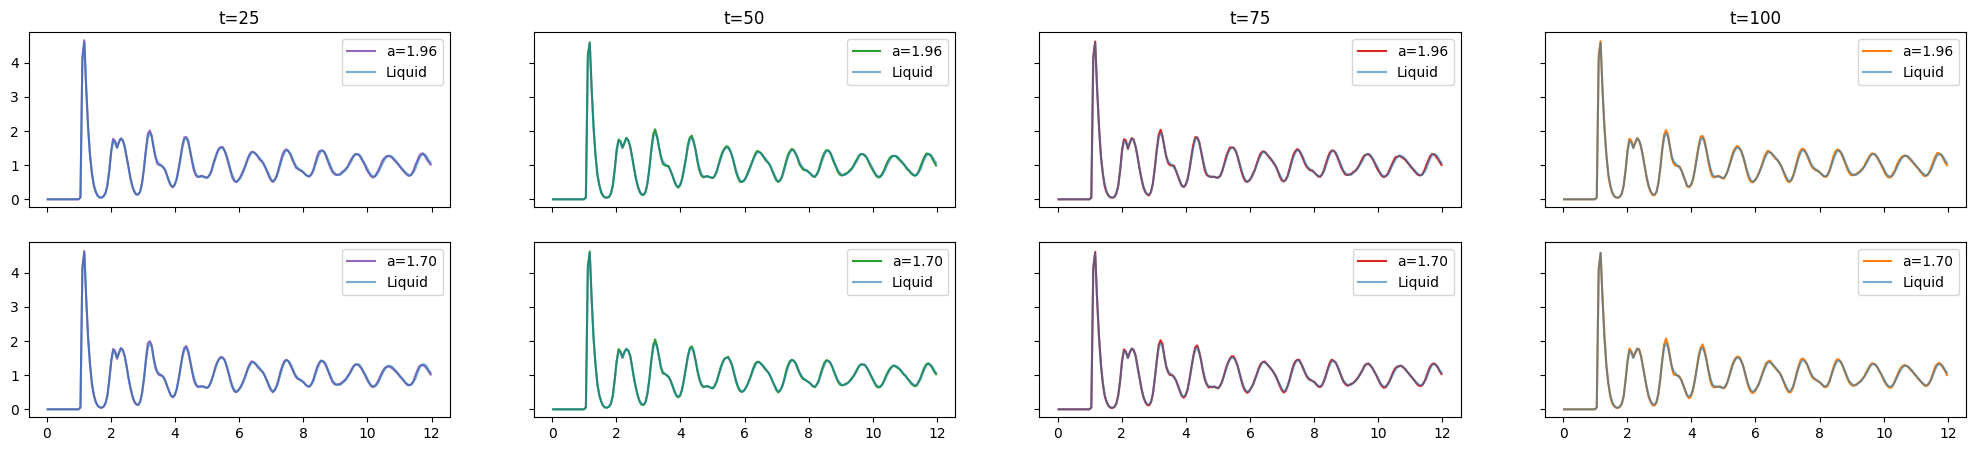

In [75]:
scales=['0.3','0.4','0.5','0.6','0.7']
lats=['1.96','1.70','1.52','1.38','1.29']
times=['25','50','75','100']

fig, ax = plt.subplots(2, 4, figsize=(25,5), dpi=100, sharex=True, sharey=True)
colors = ['tab:purple','tab:green', 'tab:red','tab:orange' ]

v=4
for i in range(len(mydatardf)):
    if i<=3:
        n=0
        ii=i-n*v
        ax[n,ii].plot(xrdf[i], yrdf[i], color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')
        ax[n,ii].set_title(f't={times[i]}')
        ax[n,ii].legend(loc='upper right')
    elif 3<i<=7:
        n=1
        ii=i-n*v
        ax[n,ii].plot(xrdf[i], yrdf[i], color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')
        ax[n,ii].legend(loc='upper right')
    elif 7<i<=11:
        n=2
        ii=i-n*v
        ax[n,ii].plot(xrdf[i], yrdf[i], color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')      
        ax[n,ii].legend(loc='upper right')
    elif 11<i<=15:
        n=3
        ii=i-n*v
        ax[n,ii].plot(xrdf[i], yrdf[i], color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')
        ax[n,ii].legend(loc='upper right')
    elif 15<i<=19:
        n=4
        ii=i-n*v
        ax[n,ii].plot(xrdf[i], yrdf[i], color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')
        ax[n,ii].legend(loc='upper right')

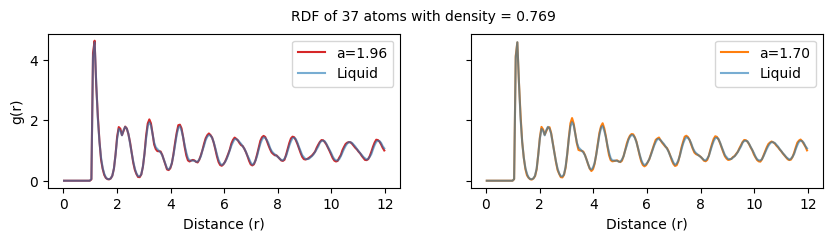

In [76]:
scales=['0.3','0.4']
lats=['1.96','1.70','1.52','1.38','1.29']
atoms=37

fig, ax = plt.subplots(1, 2, figsize=(10,2), dpi=100, sharex=True, sharey=True)
colors = ['tab:red','tab:orange', 'tab:green','tab:purple','tab:brown']

for i in range(len(scales)):
    ii= 4*i+3
    # print(ii)
    ax[i].plot(xrdf[ii], yrdf[ii], color=colors[i],label=f'a={lats[i]}')
    ax[i].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')
    ax[i].legend(loc='upper right')
    ax[0].set_ylabel('g(r)')
    ax[i].set_xlabel('Distance (r)')

    
plt.suptitle(f'RDF of {atoms} atoms with density = {density}', y=1, size=10)

# plt.savefig(f'rdf_{atoms}-atoms_d-{density}.png', dpi=100,bbox_inches='tight')

## ▻ Bond Order Analysis - 37 atoms

In [77]:
scales=['0.3','0.4']
times=['25','50','75','100']
mydataq = []

atoms=37
for i in scales:
    for time in times:
        myfileq= np.genfromtxt(f'density--{totalatoms}--116.72x116.72/hex-{i}/{atoms}-atoms/dump-q-at_t{time}-{atoms}.lammpstrj', skip_header=9, unpack=True, usecols=(5,6))
        mydataq.append(myfileq) 
    
xq=[]
yq=[]

for i in range(len(mydataq)):
    xxq=mydataq[i][0]
    yyq=mydataq[i][1]
    xq.append(xxq)
    yq.append(yyq)

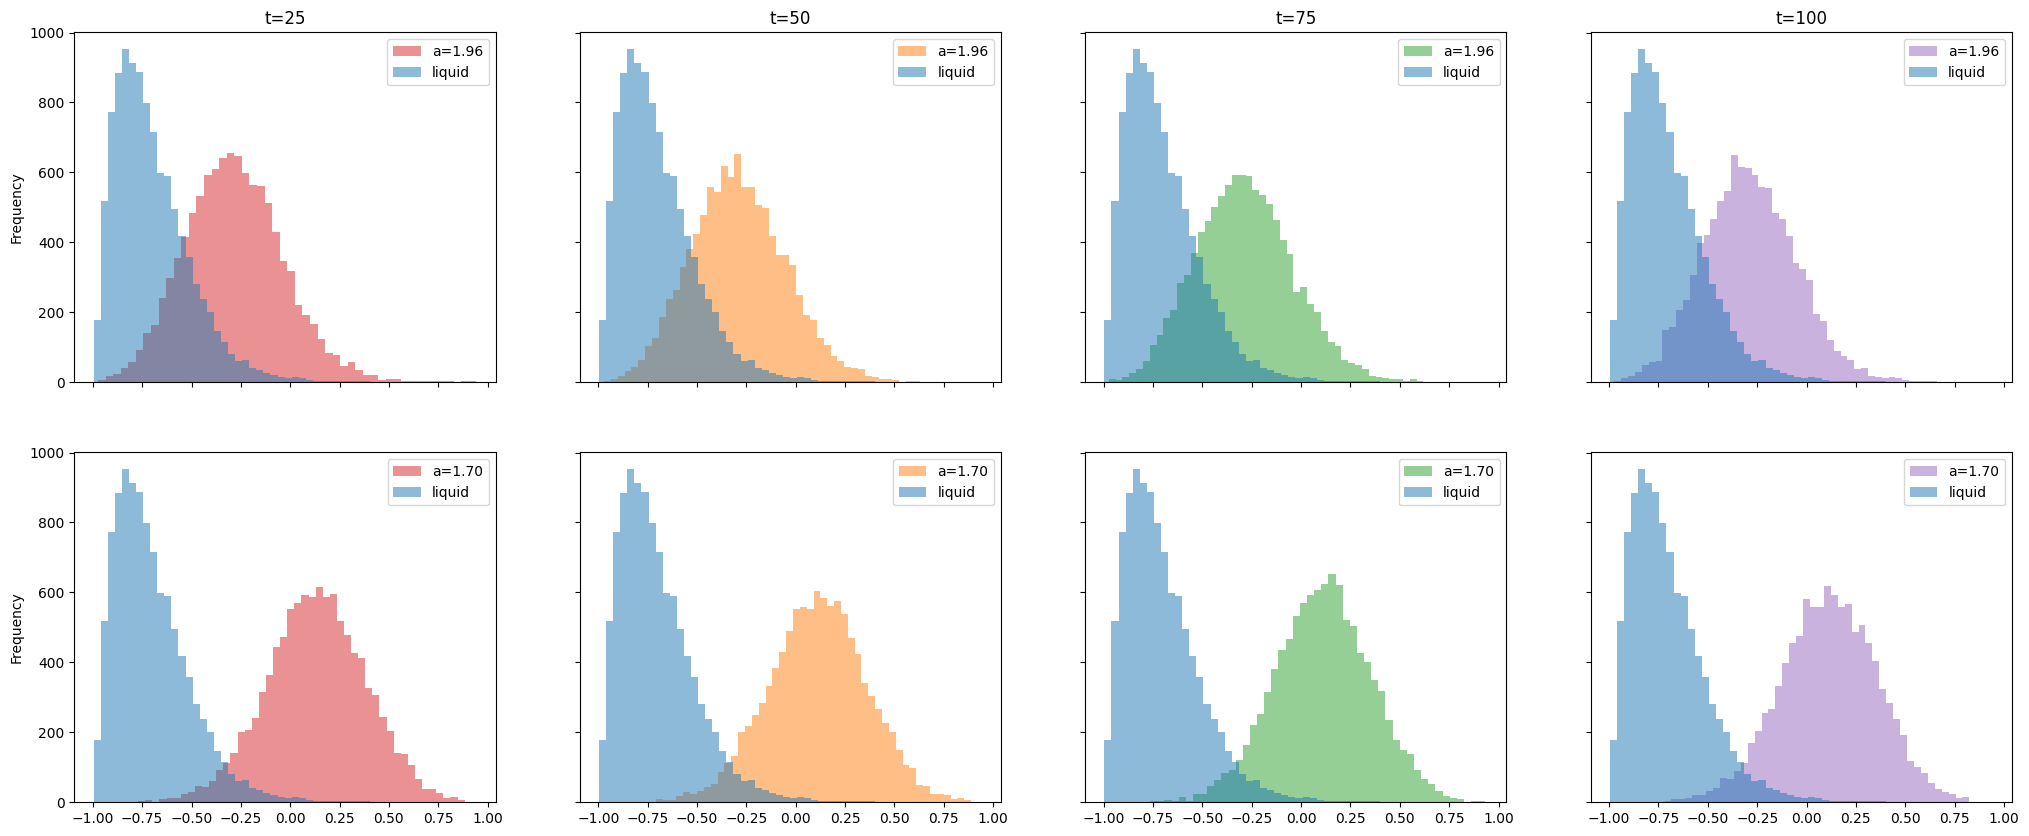

In [78]:
scales=['0.3','0.4']
lats=['1.96','1.70']
times=['25','50','75','100']

fig, ax = plt.subplots(2, 4, figsize=(25,10), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:purple', 'tab:olive', 'tab:brown' ]

v=4
for i in range(len(xq)):
    if i<=3:
        n=0
        ii=i-n*v
        x = xq[i] 
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper right')
        ax[n,0].set_ylabel('Frequency')
        # ax[n,].set_xlabel('q6')
        ax[n,ii].set_title(f't={times[i]}')
    elif 3<i<=7:
        n=1
        ii=i-n*v
        x = xq[i] 
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper right')
        ax[n,0].set_ylabel('Frequency')
    elif 7<i<=11:
        n=2
        ii=i-n*v
        x = xq[i]
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper right')
        ax[n,0].set_ylabel('Frequency')
    elif 11<i<=15:
        n=3
        ii=i-n*v
        x = xq[i] 
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper right')
        ax[n,0].set_ylabel('Frequency')
    elif 15<i<=19:
        n=4
        ii=i-n*v
        x = xq[i]
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper right')
        ax[n,0].set_ylabel('Frequency')

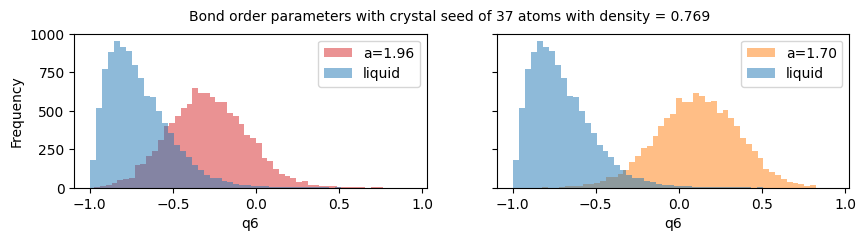

In [79]:
scales=['0.3','0.4']
lats=['1.96','1.70']
atoms=37

fig, ax = plt.subplots(1, 2, figsize=(10,2), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:purple', 'tab:olive', 'tab:brown' ]

for i in range(len(scales)):
    ii= 4*i+3
    # print(ii)
    ax[i].hist(xq[ii], alpha=0.5, bins=50, density=False, stacked=True, color=colors[i],label=f'a={lats[i]}')
    ax[i].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
    ax[i].legend(loc='upper right')
    ax[0].set_ylabel('Frequency')
    ax[i].set_xlabel('q6')
    
plt.suptitle(f'Bond order parameters with crystal seed of {atoms} atoms with density = {density}', y=1, size=10)
    
# plt.savefig(f'hist_{atoms}-atoms_d-{density}.png', dpi=100,bbox_inches='tight')

# ◆  Density=0.789 - seed of 37 atoms (different lattice spacings)

In [80]:
totalatoms=10762
density=0.789

## ▻ Radial Distribution Function -  Pure Liquid 

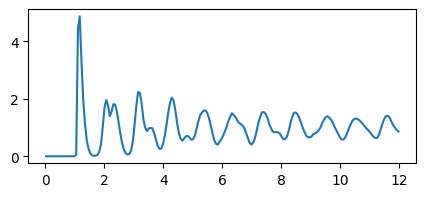

In [81]:
rdfl= pd.read_csv(f'density--{totalatoms}--116.72x116.72/pure-liquid/rdf-pure_liquid.txt', sep=" ", skiprows=2, header=None) 
# rdfc= pd.read_csv('pure_crystal/rdf-pure_crystal.txt', sep=" ", skiprows=2, header=None)

xl=rdfl[0]
yl=rdfl[1]

colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive', 'tab:brown' ]

plt.figure(figsize=(5,2))
plt.plot(xl,yl, color='tab:blue')

## ▻ Bond Orientational Order

Text(0.5, 1.0, 'q6 histogram of pure liquid system')

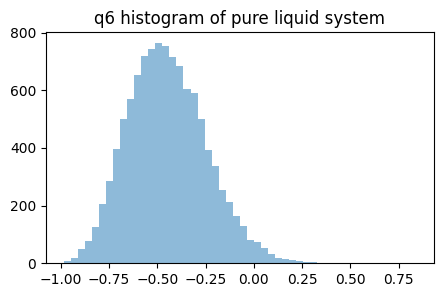

In [82]:
q6r_l, lq6i_l = np.genfromtxt(f'density--{totalatoms}--116.72x116.72/pure-liquid/dump-q.lammpstrj',skip_header=9, unpack=True, usecols=(5,6))

plt.figure(figsize=(5,3))
plt.hist(q6r_l, alpha=0.5, bins=50, density=False, stacked=True, color='tab:blue')
plt.title('q6 histogram of pure liquid system')

## ▻ Radial Distribution Function - 37 atoms

In [83]:
scales=['0.3','0.4']
times=['25','50','75','100']
mydatardf = []
atoms=37

for i in scales:
    for time in times:
        my_rdf_file= pd.read_csv(f'density--{totalatoms}--116.72x116.72/hex-{i}/{atoms}-atoms/rdf_at_t{time}-{atoms}-atoms.txt', sep=" ", skiprows=2, header=None)
        mydatardf.append(my_rdf_file)
xrdf=[]
yrdf=[]

for i in range(len(mydatardf)):
    xxrdf=mydatardf[i][0]
    yyrdf=mydatardf[i][1]
    xrdf.append(xxrdf)
    yrdf.append(yyrdf)

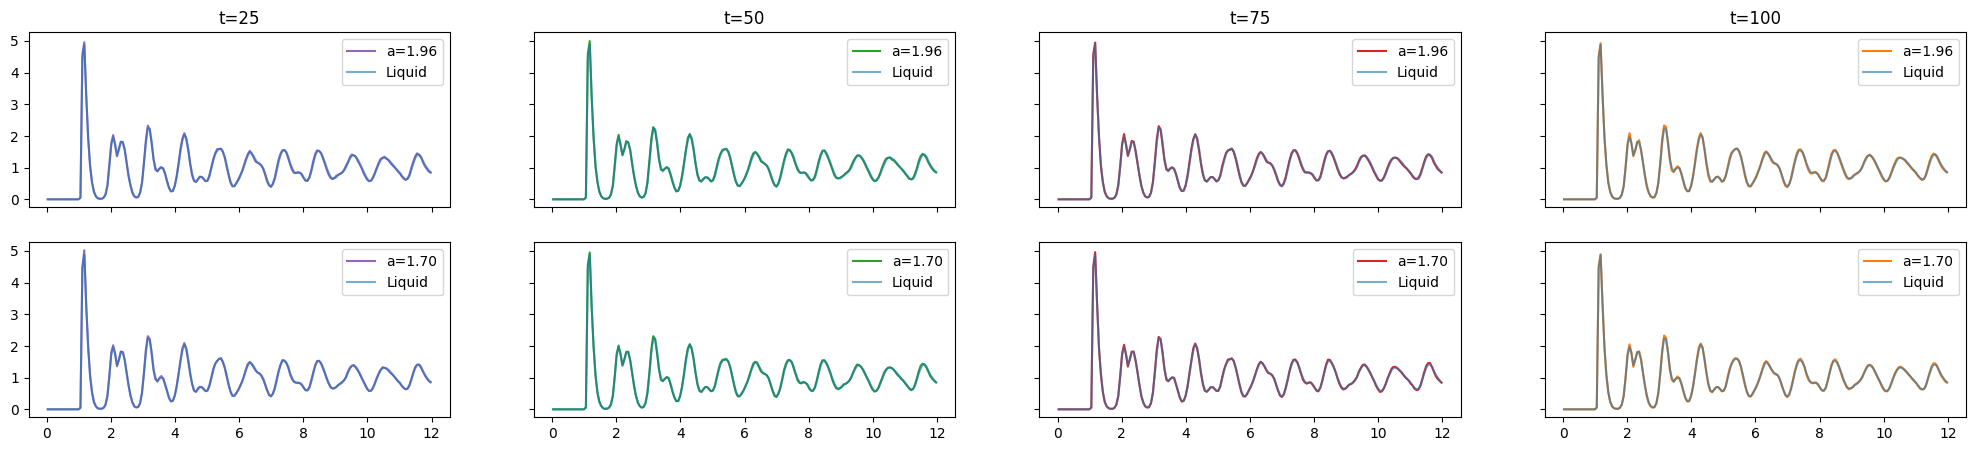

In [84]:
scales=['0.3','0.4','0.5','0.6','0.7']
lats=['1.96','1.70','1.52','1.38','1.29']
times=['25','50','75','100']

fig, ax = plt.subplots(2, 4, figsize=(25,5), dpi=100, sharex=True, sharey=True)
colors = ['tab:purple','tab:green', 'tab:red','tab:orange' ]

v=4
for i in range(len(mydatardf)):
    if i<=3:
        n=0
        ii=i-n*v
        ax[n,ii].plot(xrdf[i], yrdf[i], color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')
        ax[n,ii].set_title(f't={times[i]}')
        ax[n,ii].legend(loc='upper right')
    elif 3<i<=7:
        n=1
        ii=i-n*v
        ax[n,ii].plot(xrdf[i], yrdf[i], color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')
        ax[n,ii].legend(loc='upper right')
    elif 7<i<=11:
        n=2
        ii=i-n*v
        ax[n,ii].plot(xrdf[i], yrdf[i], color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')      
        ax[n,ii].legend(loc='upper right')
    elif 11<i<=15:
        n=3
        ii=i-n*v
        ax[n,ii].plot(xrdf[i], yrdf[i], color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')
        ax[n,ii].legend(loc='upper right')
    elif 15<i<=19:
        n=4
        ii=i-n*v
        ax[n,ii].plot(xrdf[i], yrdf[i], color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')
        ax[n,ii].legend(loc='upper right')

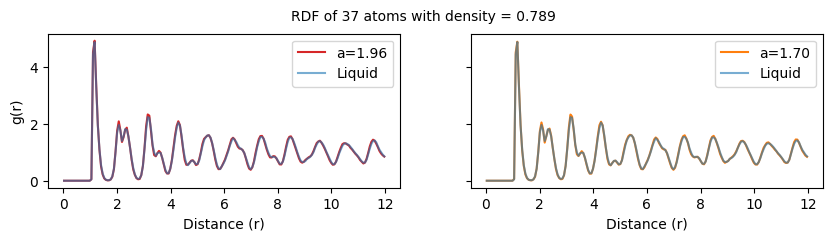

In [85]:
scales=['0.3','0.4']
lats=['1.96','1.70','1.52','1.38','1.29']
atoms=37

fig, ax = plt.subplots(1, 2, figsize=(10,2), dpi=100, sharex=True, sharey=True)
colors = ['tab:red','tab:orange', 'tab:green','tab:purple','tab:brown']

for i in range(len(scales)):
    ii= 4*i+3
    # print(ii)
    ax[i].plot(xrdf[ii], yrdf[ii], color=colors[i],label=f'a={lats[i]}')
    ax[i].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')
    ax[i].legend(loc='upper right')
    ax[0].set_ylabel('g(r)')
    ax[i].set_xlabel('Distance (r)')

    
plt.suptitle(f'RDF of {atoms} atoms with density = {density}', y=1, size=10)

# plt.savefig(f'rdf_{atoms}-atoms_d-{density}.png', dpi=100,bbox_inches='tight')

## ▻ Bond Order Analysis - 37 atoms

In [86]:
scales=['0.3','0.4']
times=['25','50','75','100']
mydataq = []

atoms=37
for i in scales:
    for time in times:
        myfileq= np.genfromtxt(f'density--{totalatoms}--116.72x116.72/hex-{i}/{atoms}-atoms/dump-q-at_t{time}-{atoms}.lammpstrj', skip_header=9, unpack=True, usecols=(5,6))
        mydataq.append(myfileq) 
    
xq=[]
yq=[]

for i in range(len(mydataq)):
    xxq=mydataq[i][0]
    yyq=mydataq[i][1]
    xq.append(xxq)
    yq.append(yyq)

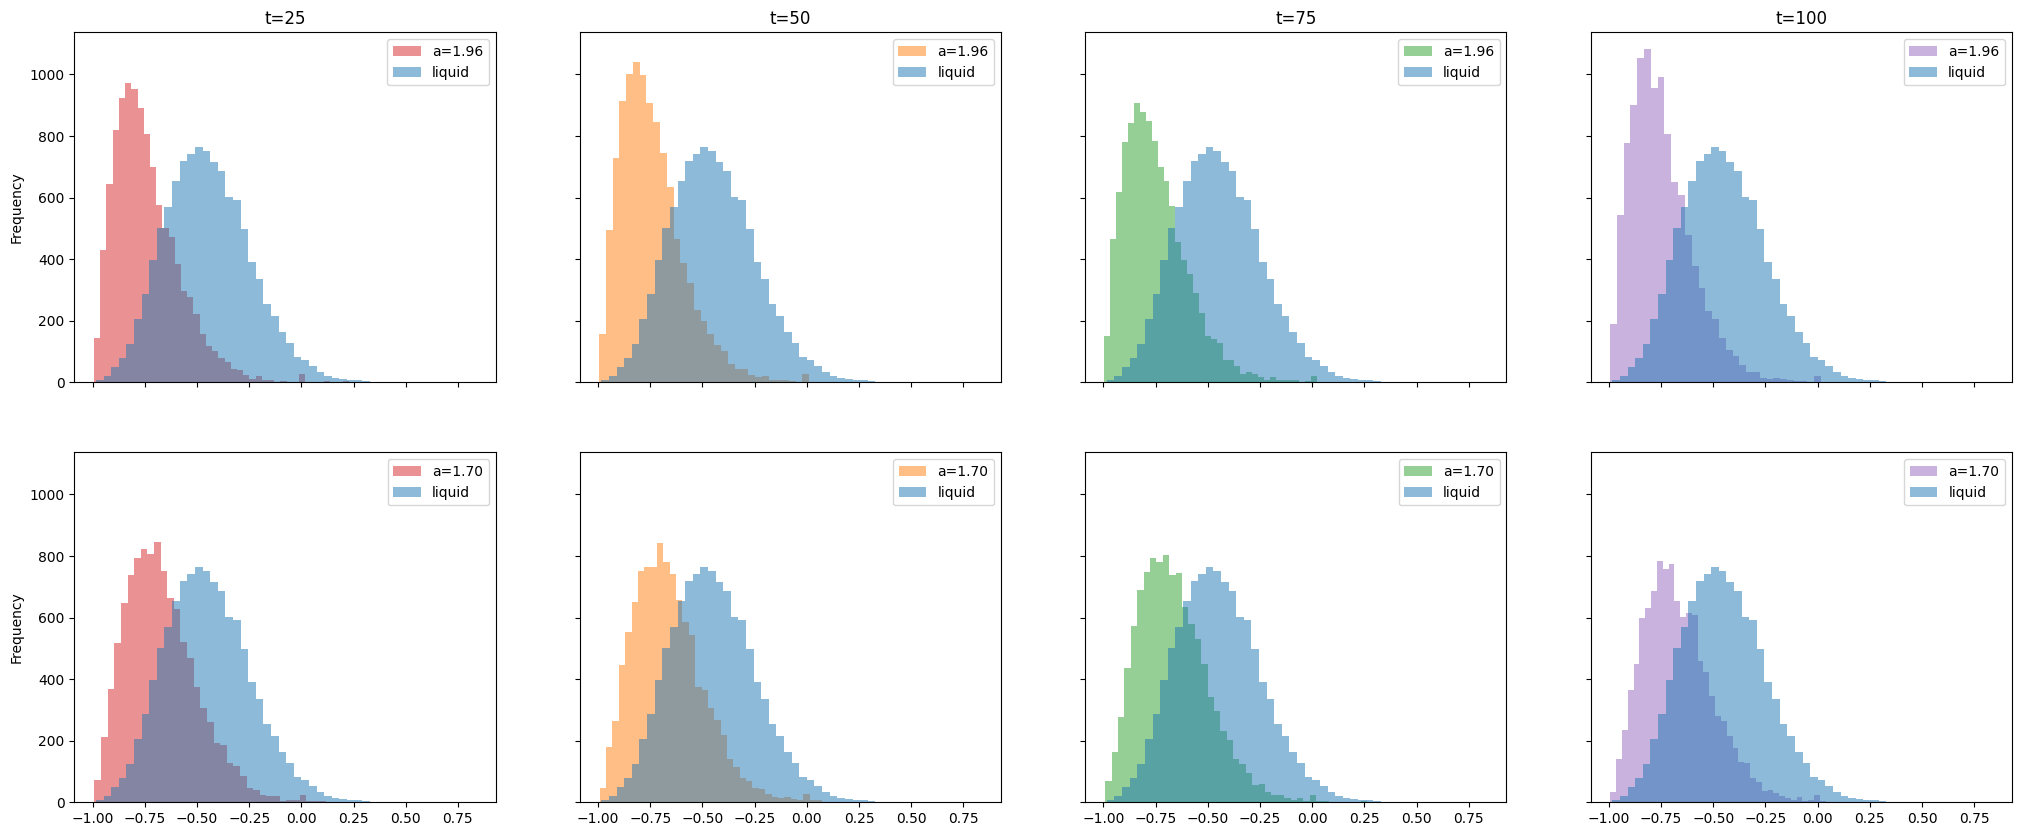

In [87]:
scales=['0.3','0.4']
lats=['1.96','1.70']
times=['25','50','75','100']

fig, ax = plt.subplots(2, 4, figsize=(25,10), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:purple', 'tab:olive', 'tab:brown' ]

v=4
for i in range(len(xq)):
    if i<=3:
        n=0
        ii=i-n*v
        x = xq[i] 
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper right')
        ax[n,0].set_ylabel('Frequency')
        # ax[n,].set_xlabel('q6')
        ax[n,ii].set_title(f't={times[i]}')
    elif 3<i<=7:
        n=1
        ii=i-n*v
        x = xq[i] 
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper right')
        ax[n,0].set_ylabel('Frequency')
    elif 7<i<=11:
        n=2
        ii=i-n*v
        x = xq[i]
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper right')
        ax[n,0].set_ylabel('Frequency')
    elif 11<i<=15:
        n=3
        ii=i-n*v
        x = xq[i] 
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper right')
        ax[n,0].set_ylabel('Frequency')
    elif 15<i<=19:
        n=4
        ii=i-n*v
        x = xq[i]
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper right')
        ax[n,0].set_ylabel('Frequency')

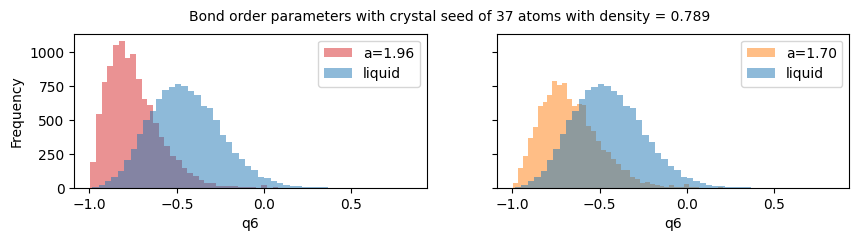

In [88]:
scales=['0.3','0.4']
lats=['1.96','1.70']
atoms=37

fig, ax = plt.subplots(1, 2, figsize=(10,2), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:purple', 'tab:olive', 'tab:brown' ]

for i in range(len(scales)):
    ii= 4*i+3
    # print(ii)
    ax[i].hist(xq[ii], alpha=0.5, bins=50, density=False, stacked=True, color=colors[i],label=f'a={lats[i]}')
    ax[i].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
    ax[i].legend(loc='upper right')
    ax[0].set_ylabel('Frequency')
    ax[i].set_xlabel('q6')
    
plt.suptitle(f'Bond order parameters with crystal seed of {atoms} atoms with density = {density}', y=1, size=10)
    
# plt.savefig(f'hist_{atoms}-atoms_d-{density}.png', dpi=100,bbox_inches='tight')